
#Canny Edge Detector Project Computer Vision
##Pranjal Jain

pj2069 N17594803






In [ ]:



#Importing libraries for Numpy, Math, cv2,  matplotlib, and files upload
import numpy as np
import cv2
from google.colab import files
#Upload files
uploaded = files.upload()
import math
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Saving House.bmp to House (2).bmp
Saving Test patterns.bmp to Test patterns (2).bmp


In [ ]:
#To display images with title
def display(img,title): 
    print(title)
    cv2_imshow(img)

In [ ]:
#Function for Gaussian Smoothing, takes the image in grayscale as input
def gaussian(im):
  #defining gaussian filter as a numpy array
  gaussian_filter = np.array([
                    [1,1,2,2,2,1,1],
                    [1,2,2,4,2,2,1], 
                    [2,2,4,8,4,2,2],
                    [2,4,8,16,8,4,2],
                    [2,2,4,8,4,2,2],
                    [1,2,2,4,2,2,1],
                    [1,1,2,2,2,1,1]
                    ],np.float32) 
  #finding width and height of image
  width, height= im.shape
  
  #defining a new matrix to apply gaussian operation on
  gaussian_smoothedImage = im.copy()
  #double for loop to iterate over the image matrix
  for i in range(width):
    for j in range(height):
      #we set the pixel values for new image to 0 when the mask goes out of range 
      if (i <= 2) or (j <= 2) or (i >= width -3 ) or (j >=height-3):
        gaussian_smoothedImage[i][j] = 0 
      else:
        # Get the 7x7 part of the matrix on which we will convolve the gaussian filter
        block= gaussian_smoothedImage[i-3:i+3+1, j-3:j+3+1]
        mean = 0
        #convolve the block from image and gaussian filter both having size 7x7
        for k in range(7):
          for l in range(7):
            mean = mean + (block[k][l] * gaussian_filter[k][l])
        #get the mean of the block and divide by 140 (sum of all values from gaussian filter)
        a = mean/140
        #set value of array[i][j] as the mean
        gaussian_smoothedImage[i][j] = a
  
  #display image
  display(gaussian_smoothedImage, 'Gaussian Smoothed Image')
  
  #return the Smoothened image
  return(gaussian_smoothedImage)

In [ ]:
#Function for Prewitts edge detection, takes the Gaussian smoothened image as input
def prewitts(gaussian_smoothedImage):
  #define Horizontal Gradient Magitude as Gx, Vertical Magnitude as Gy, and Magnitude as M
  
  Gx = gaussian_smoothedImage.copy()
  #Kx and Ky are temporary matrices to get values from Input image smoothened
  Kx = gaussian_smoothedImage.copy()

  #define the prewitts edge detector matrix as Mx and My
  Mx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]], np.float32)
  My = np.array([[1,1,1], [0,0,0], [-1,-1,-1]],np.float32)
  

  #get height and width of image 
  width, height = gaussian_smoothedImage.shape
  
  #double for loop to iterate over the image matrix
  for i in range(width):
    for j in range(height):
      #we set the pixel values for new image to 0 when the mask goes out of range 
      if (i <= 3) or (j <= 3) or (i >= width -4 ) or (j >=height-4):
        Gx[i][j] = 0 
      else:
        # Get the 3x3 part of the matrix on which we will convolve the Mx
        block= Kx[i-1:i+2, j-1:j+2]
        mean = 0
        for k in range(3):
          for l in range(3):
            mean = mean + (block[k][l] * Mx[k][l])
        #Normalize with 3
        Gx[i][j] = abs(mean)/3
        
  display(Gx, 'Horizontal Magnitude')
   
  Gy = gaussian_smoothedImage.copy()
  Ky = gaussian_smoothedImage.copy()

  for i in range(width):
    for j in range(height):
      if (i <= 3) or (j <= 4) or (i >= width -4) or (j >=height-4):
        Gy[i][j] = 0 
      else:
        block= Ky[i-1:i+2, j-1:j+2]
        mean = 0
        for k in range(3):
          for l in range(3):
            mean = mean + (block[k][l] * My[k][l])
        Gy[i][j] = abs(mean)/3
      
  display(Gy, 'Vertical Magnitude')


  
  M = gaussian_smoothedImage.copy()
  #Define tanValue matrix to store tan inverse values from Gx and Gy
  tanValue = gaussian_smoothedImage.copy()
  for i in range(width):
    for j in range(height):
      #ignoring border pixels
      if (i <= 3) or (j <= 3) or (i >= width -4 ) or (j >=height-4):
        M[i][j] = 0 
      else:
        #define Magnitude by doing Gx/Gy and normalising by 2
        M[i][j] = (abs(Gx[i][j]) + abs(Gy[i][j]))
        #if Gy is 0, we cannot find TanInverse of that pixel, here we directly define the value to 90
        if Gy[i][j] == 0:
          tanValue[i][j] = 90
        else:
          #find tan inverse value for all pixels
          tanValue[i][j] = math.degrees(math.atan(Gx[i][j]/ Gy[i][j]))/2
          if tanValue[i][j] < 0:
            tanValue[i][j] += 360

  display(M, 'Final Magnitude')
  #return Magnitude and tanInverse matrix
  return(M, tanValue)
  

In [ ]:
#Function for NonMaxima Supression, takes the Magnitude matrix and tan inverse value matrix input
def nonMaximaSupression(M, tanValue):
  width, height= M.shape
  sector = M.copy()
  
  #iterating over the matrix 
  for i in range(5, width-6):
    for j in range(5, height-6):
      #defining sector values for each pixel
      if tanValue[i][j] >= 337.5 or tanValue[i][j] <= 22.5:
        sector[i][j] = 0 

      elif 22.5 < tanValue[i][j] <= 67.5:
        sector[i][j] = 1 

      elif 67.5 < tanValue[i][j] <= 112.5:
        sector[i][j] = 2

      elif 112.5 < tanValue[i][j] <= 157.5:
        sector[i][j] = 3 

      elif 157.5 < tanValue[i][j] <= 202.5:
        sector[i][j] = 0 

      elif 202.5 < tanValue[i][j] <= 247.5:
        sector[i][j] = 1

      elif 247.5 < tanValue[i][j] <= 292.5:
        sector[i][j] = 2  
      
      elif 292.5 < tanValue[i][j] <= 337.5:
        sector[i][j] = 3
      else:
        sector[i][j] = 0


  nms = M.copy()
  #finding Non maxima supression matrix by finding maxima for that particular angle from Tan inverse Values
  for i in range(5, width-6):
    for j in range(5,height-6):
      if sector[i][j] == 0:
        if max(M[i-1][j], M[i+1][j]) < M[i][j]:
          nms[i][j] = M[i][j]
        else:
          nms[i][j] = 0 


      elif sector[i][j] == 1:
        if max( M[i+1][j-1], M[i-1][j+1]) < M[i][j]:
          nms[i][j] = M[i][j]
        else:
          nms[i][j] = 0         

      elif sector[i][j] == 2:
        if max(M[i][j-1], M[i][j+1]) < M[i][j]:
          nms[i][j] = M[i][j]
        else:
          nms[i][j] = 0    

      elif sector[i][j] == 3:
        if max( M[i-1][j-1], M[i+1][j+1]) < M[i][j]:
          nms[i][j] = M[i][j]
        else:
          nms[i][j] = 0  
   
  display(nms, 'Non Maxima Supression Matrix')
  
  print("NMS")
  #returning final NMS matrix
  return(nms)
  

In [ ]:
#Function for thresholding, takes the NMS Output response as input
def thresholding(nms):
  width, height= nms.shape
  #finding the 25th, 50th, 75th percentile of pixel from intensity values
  threshold_25 = np.percentile(nms[nms!=0], 25)
  threshold_50 = np.percentile(nms[nms!=0], 50)
  threshold_75 = np.percentile(nms[nms!=0], 75)

  #defining three matrices that will threshold for 25th, 50th, and 75th percentile pixel intensity threshold value
  nms25th = nms.copy()
  nms50th = nms.copy()
  nms75th = nms.copy()
  for i in range(width):
    for j in range(height):
      if (i <= 5) or (j <= 5) or (i >= width -6 ) or (j >=height-6):
        nms25th[i][j] = 255
        nms50th[i][j] = 255
        nms75th[i][j] = 255
      else:
        if nms[i][j] >= threshold_25:
          nms25th[i][j] = 0
        else: 
          nms25th[i][j] = 255


        if nms[i][j] >= threshold_50:
          nms50th[i][j] = 0
        else: 
          nms50th[i][j] = 255

        if nms[i][j] >= threshold_75:
          nms75th[i][j] = 0
        else: 
          nms75th[i][j] = 255

  display(nms25th, '25th Percentile Threshold Image')
  display(nms50th, '50th Percentile Threshold Image')
  display(nms75th, '75th Percentile Threshold Image')

In [ ]:
#Final function to call all functions, takes image as input and prints the final images
def cannyEdge(im):
  #display Image
  display(im, 'Original Image')
  #Perform Gaussian Smoothing
  gaussianImage = gaussian(im)
  #Perform Prewitts operation
  magnitude, tanInverseValues = prewitts(gaussianImage)
  #Perform Non Maxima Supression 
  nmsImage = nonMaximaSupression(magnitude, tanInverseValues)
  #Perform thresholding 
  thresholding(nmsImage)

Original Image


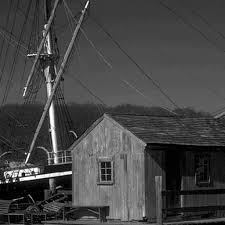

Gaussian Smoothed Image


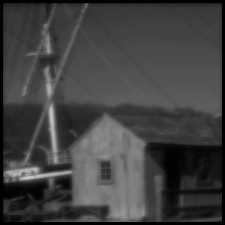

Horizontal Magnitude


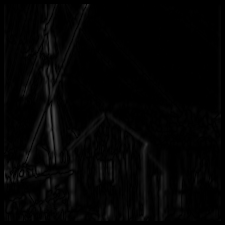

Vertical Magnitude


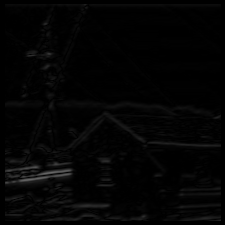

Final Magnitude


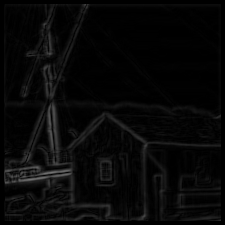

Non Maxima Supression Matrix


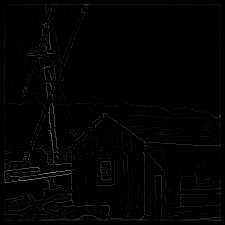

NMS
25th Percentile Threshold Image


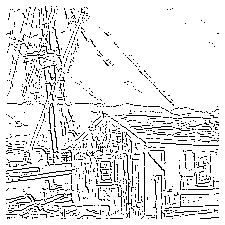

50th Percentile Threshold Image


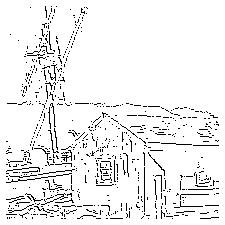

75th Percentile Threshold Image


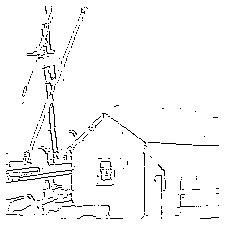

In [ ]:
from google.colab.patches import cv2_imshow
im = cv2.imread("House.bmp",0)
cannyEdge(im)


Original Image


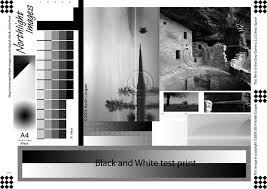

Gaussian Smoothed Image


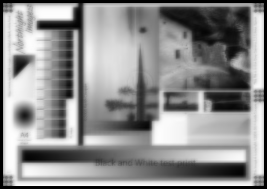

Horizontal Magnitude


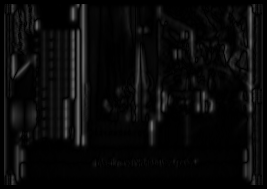

Vertical Magnitude


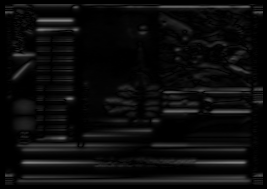

Final Magnitude


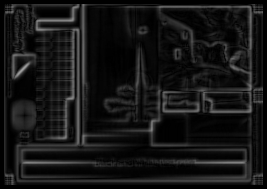

Non Maxima Supression Matrix


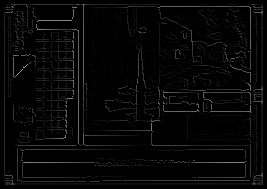

NMS
25th Percentile Threshold Image


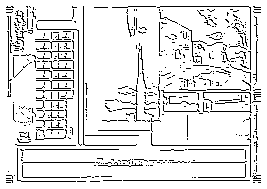

50th Percentile Threshold Image


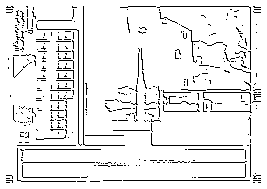

75th Percentile Threshold Image


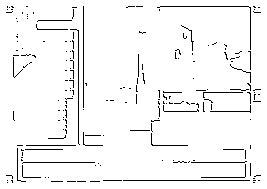

In [ ]:
im2 = cv2.imread("Test patterns.bmp",0)
cannyEdge(im2)